In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\user\AppData\Local\Temp\ipykernel_12284\328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df = pd.read_csv('RestaurantVisitors.csv', index_col='date', parse_dates=True)
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [5]:
df.index.freq = 'D'
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
df1 = df.dropna()
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']
for column in cols:
    df1[column] = df1[column].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_12284\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12284\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column] = df1[column].astype(int)
C:\Users\user\AppData\Local\Temp\ipykernel_12284\2276344416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Freq: D
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekday       478 non-null    object
 1   holiday       478 non-null    int64 
 2   holiday_name  478 non-null    object
 3   rest1         478 non-null    int32 
 4   rest2         478 non-null    int32 
 5   rest3         478 non-null    int32 
 6   rest4         478 non-null    int32 
 7   total         478 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 24.3+ KB


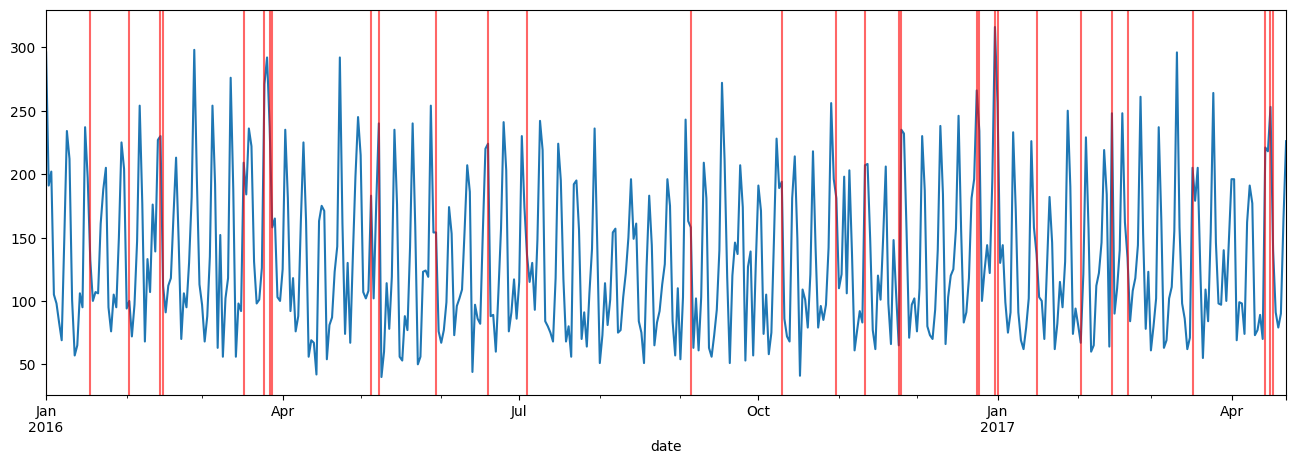

In [13]:
ax = df1['total'].plot(figsize=(16, 5))
for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='r', alpha=0.6)

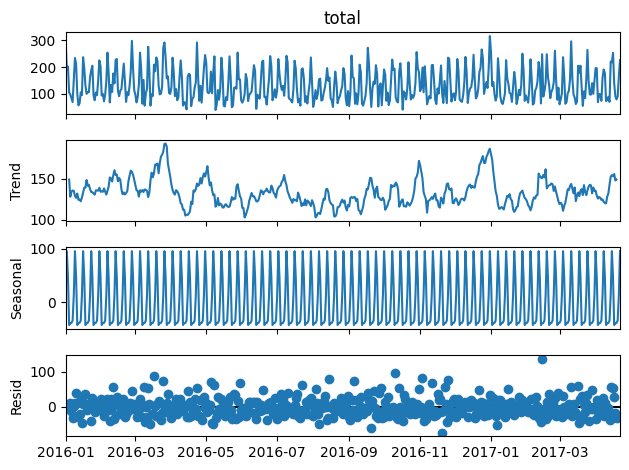

In [14]:
reslt = seasonal_decompose(df1['total'])
reslt.plot();

In [15]:
auto_arima(df1['total'], seasonal=True, m=7, trace=True).summary() 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.94 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.50 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.08 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.35 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4792.309, Time=0.82 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.38 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4954.216, Time=2.02 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.89 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=2.58 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4766.843, Time=0.72 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2379.422
Date:                   Thu, 09 May 2024   AIC                           4766.843
Time:                           10:35:55   BIC                           4783.521
Sample:                       01-01-2016   HQIC                          4773.400
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.4151      1.404      2.433      0.015       0.663       6.167
ar.S.L7        0.9723      0.011     88.860      0.000       0.951       0.994
ma.S.L7       -0.7874      0.047    -16.821      0.000      -0.879      -0.696
sigma2      1216.0815     71.884     16.917      0.000    1075.192    1356.971
===================================================================================
Ljung-Box (L1) (Q):                  15.43   Jarque-Bera (JB):                72.18
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.78
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Best model:  ARIMA(0,0,0)(1,0,1)[7] intercept


In [16]:
train = df1.iloc[:-12]
test = df1.iloc[-12:]

In [17]:
len(train)

466

In [19]:
model = SARIMAX(train['total'], order=(0,0,0), seasonal_order=(1,0,1,7)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  466
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2308.583
Date:                   Thu, 09 May 2024   AIC                           4623.166
Time:                           10:40:14   BIC                           4635.598
Sample:                       01-01-2016   HQIC                          4628.059
                            - 04-10-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999    5.7e-05   1.75e+04      0.000       1.000       1.000
ma.S.L7       -0.9556      0.021    -44.839      0.000      -0.997      -0.914
sigma2      1084.8191     56.844     19.084      0.000     973.407    1196.232
===================================================================================
Ljung-Box (L1) (Q):                  11.39   Jarque-Bera (JB):                86.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.71
Prob(H) (two-sided):                  0.35   Kurtosis:                         4.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

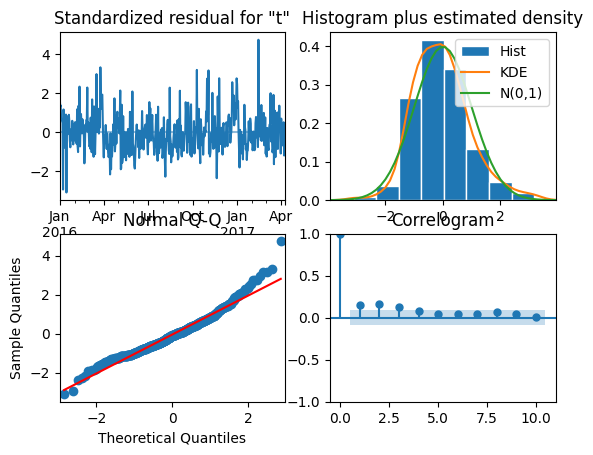

In [23]:
model.plot_diagnostics();

In [20]:
start = len(train)
end = start + len(test) - 1
prediction = model.predict(start=start, end=end, dynamic=False).rename('SARIMA')

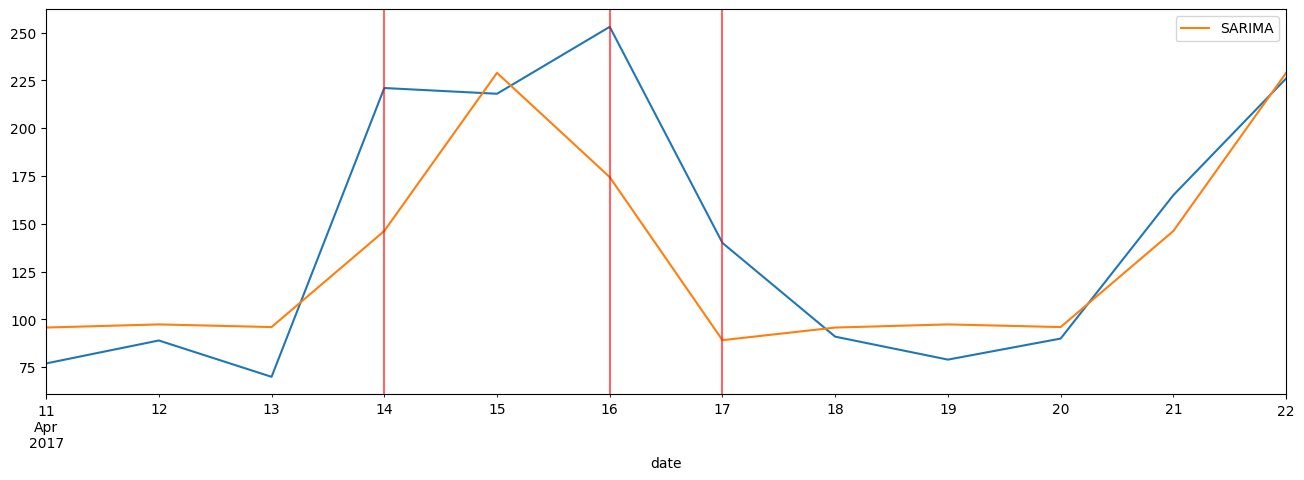

In [21]:
ax = test['total'].plot(figsize=(16, 5))
prediction.plot(ax=ax, legend=True)
for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='r', alpha=0.6)

In [24]:
from sklearn.metrics import mean_absolute_percentage_error

In [25]:
mean_absolute_percentage_error(test['total'], prediction)

0.18754528246667387

In [26]:
model2 = SARIMAX(train['total'], exog=train['holiday'], order=(0,0,0), seasonal_order=(1,0,1,7)).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  466
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2238.428
Date:                   Thu, 09 May 2024   AIC                           4484.857
Time:                           10:47:18   BIC                           4501.433
Sample:                       01-01-2016   HQIC                          4491.381
                            - 04-10-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       69.4542      3.918     17.727      0.000      61.775      77.133
ar.S.L7        1.0000   4.72e-05   2.12e+04      0.000       1.000       1.000
ma.S.L7       -0.9572      0.021    -44.806      0.000      -0.999      -0.915
sigma2       799.4072     45.648     17.513      0.000     709.939     888.875
===================================================================================
Ljung-Box (L1) (Q):                  12.55   Jarque-Bera (JB):                19.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.22
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

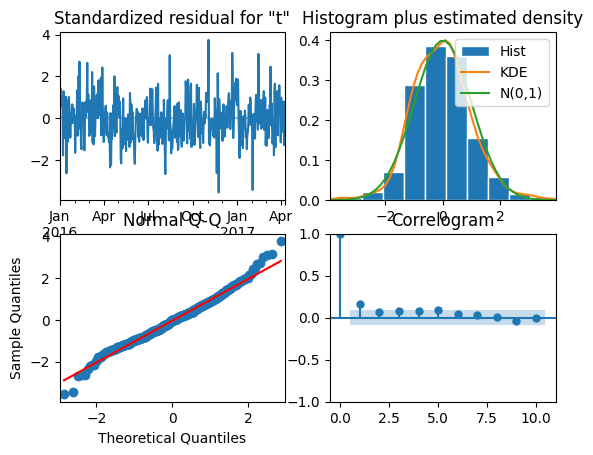

In [27]:
model2.plot_diagnostics();

In [30]:
start = len(train)
end = start + len(test) - 1
prediction = model2.predict(start=start, end=end, exog=test['holiday'], dynamic=False).rename('SARIMA')

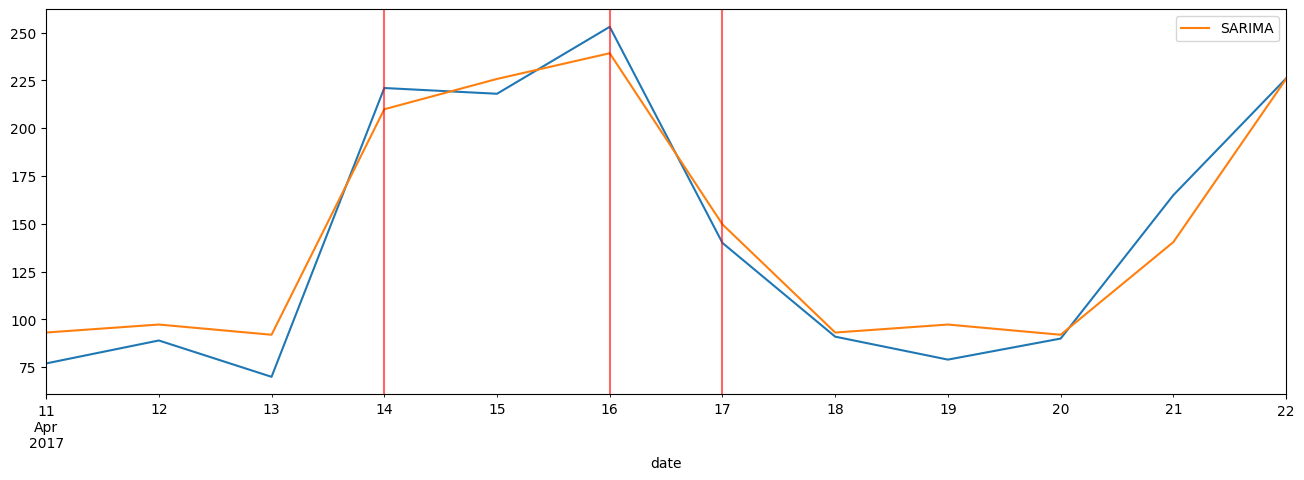

In [31]:
ax = test['total'].plot(figsize=(16, 5))
prediction.plot(ax=ax, legend=True)
for x in df1.query('holiday==1').index:
    ax.axvline(x=x, color='r', alpha=0.6)

In [32]:
mean_absolute_percentage_error(test['total'], prediction)

0.1046221396789514